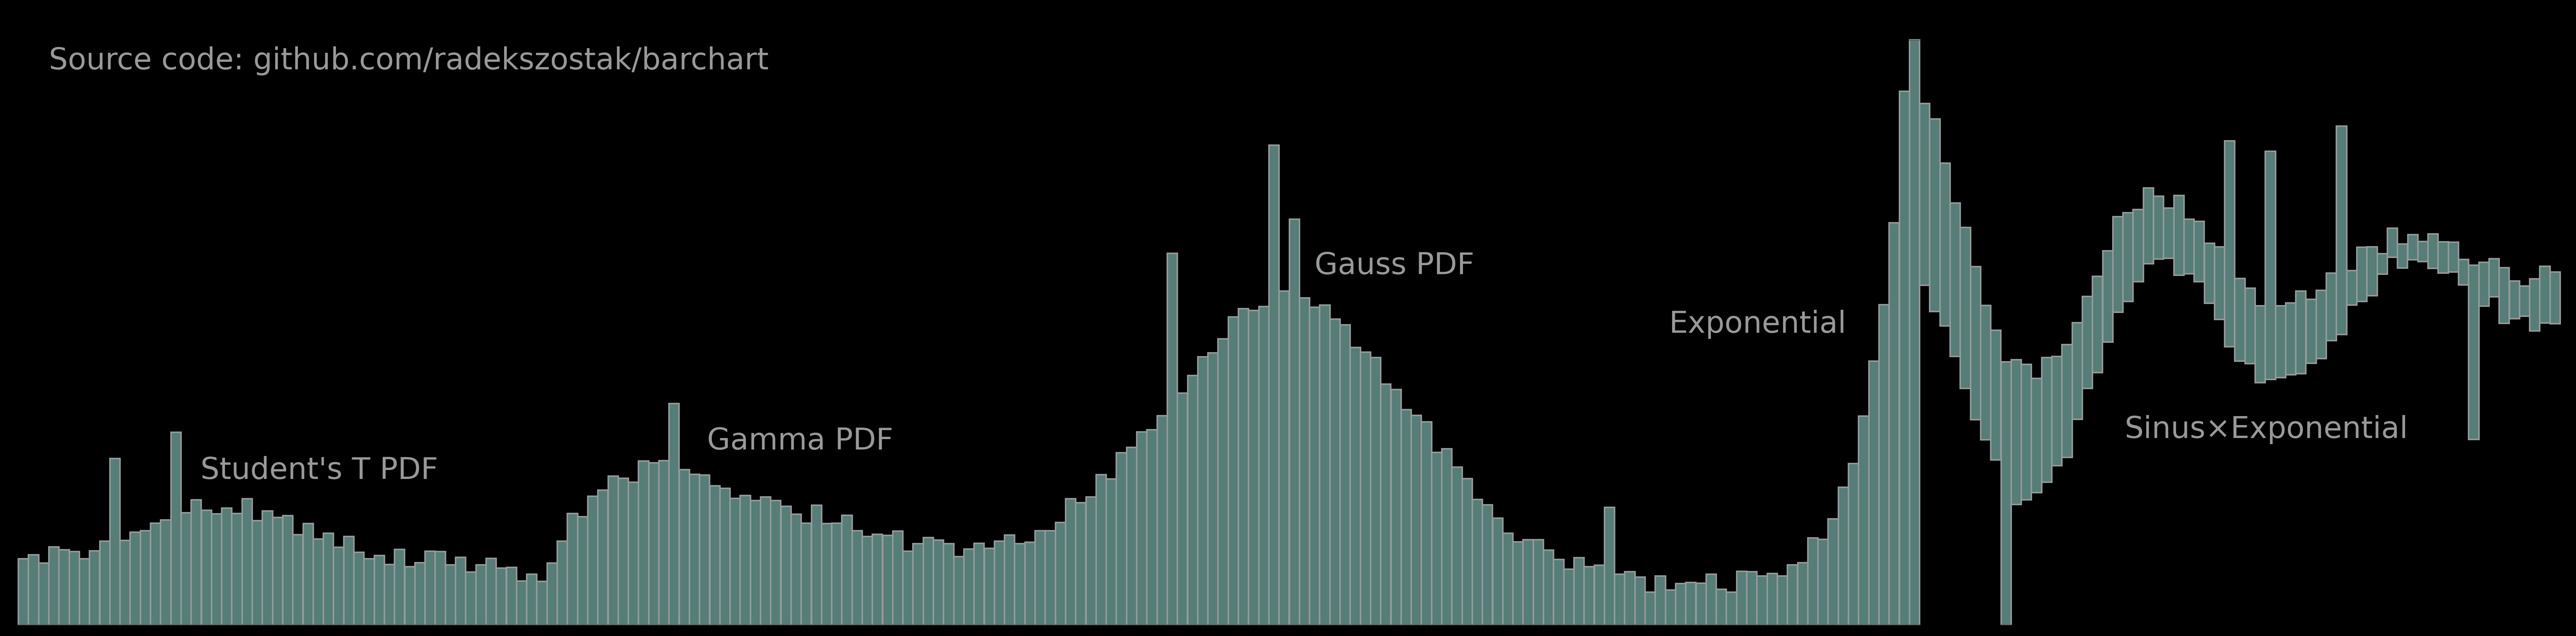

In [9]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

n_bars = 250
x = np.linspace(0, 100, n_bars)
bar_width = 100 / n_bars

# Set DPI and style
plt.rcParams['figure.dpi'] = 300
plt.style.use('dark_background')
plt.figure(figsize=(24, 6))

# Define distributions
top_left = [
    6 * scipy.stats.norm.pdf(x, 50, 5),
    10 * scipy.stats.t.pdf(x, 0.1, loc=8, scale=10),
    2 * scipy.stats.gamma.pdf((x-4) * 0.9, 2, loc=15, scale=4),
    2 * scipy.stats.expon.pdf(-x, loc=-75, scale=1.5),
]
top_right = [0.2 * np.sin(2 * np.pi / 10 * (x - 2)) * 15 * scipy.stats.expon.pdf(x, loc=75, scale=10) + 0.6]
bottom_right = [
    0.2 * np.sin(2 * np.pi / 10 * (x - 2)) * 20 * scipy.stats.expon.pdf(x, loc=75, scale=15)
    + 0.6
    - 4 * scipy.stats.expon.pdf(x, loc=75, scale=14)
]

# Apply conditions and noise
top_left = (np.array(top_left) + 0.01) * (x < 75)
top_right = np.array(top_right) * (x >= 75)
bottom_right = bottom_right + np.random.rand(len(x)) * 0.04
bottom_right = np.array(bottom_right) * (x >= 75)

bottom = bottom_right.sum(axis=0)

np.random.seed(10)
top_noise_peaks_idx = np.random.randint(0, len(x), 10)
top_noise_peaks = np.zeros(len(x))
top_noise_peaks[top_noise_peaks_idx] = np.random.rand(len(top_noise_peaks_idx)) * 0.2 + 0.1

top = top_left.sum(axis=0) + top_right.sum(axis=0)
top = top + np.random.rand(len(x)) * 0.04 + top_noise_peaks
top = np.clip(top, 0, 1)

np.random.seed(12)
bottom_noise_peaks_idx = np.random.randint(0, len(x), 10)
bottom_noise_peaks = np.zeros(len(x))
bottom_noise_peaks[bottom_noise_peaks_idx] = np.random.rand(len(bottom_noise_peaks_idx)) * 0.2 + 0.1

bottom = bottom - bottom_noise_peaks
bottom = np.clip(bottom, 0, 1)
top = top - bottom

#add text 
plt.text(1, 0.95, "Source code: github.com/radekszostak/barchart", fontsize=20, color="white")
plt.text(7, 0.25, "Student's T PDF", fontsize=20, color="white")
plt.text(27, 0.3, "Gamma PDF", fontsize=20, color="white")
plt.text(51, 0.6, "Gauss PDF", fontsize=20, color="white")
plt.text(65, 0.5, "Exponential", fontsize=20, color="white")
plt.text(83, 0.32, "Sinus×Exponential", fontsize=20, color="white")

# Create the plot
plt.bar(x, top, bottom=bottom, edgecolor='white', width=bar_width)
plt.axis("off")
plt.tight_layout()
plt.margins(x=0)

# Make rectangle filling whole plot do dim the plot
plt.gca().add_patch(plt.Rectangle((-0.5, 0), 100.9, 1, fill=True, color='black', alpha=0.4, zorder=3))

# Save the plot
plt.savefig('barchart.png')
plt.show()
